### Importación de datos



-------------------------CARGANDO Y PROCESANDO DATOS...-------------------------
----------------------
REALIZANDO ANÁLISIS COMPARATIVO...-----------------------
-------------------------
GENERANDO VISUALIZACIONES...--------------------------


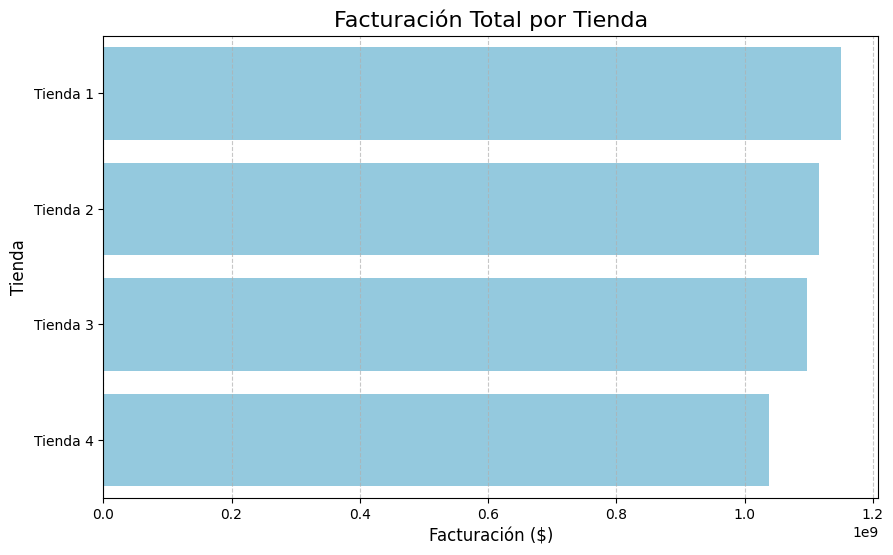

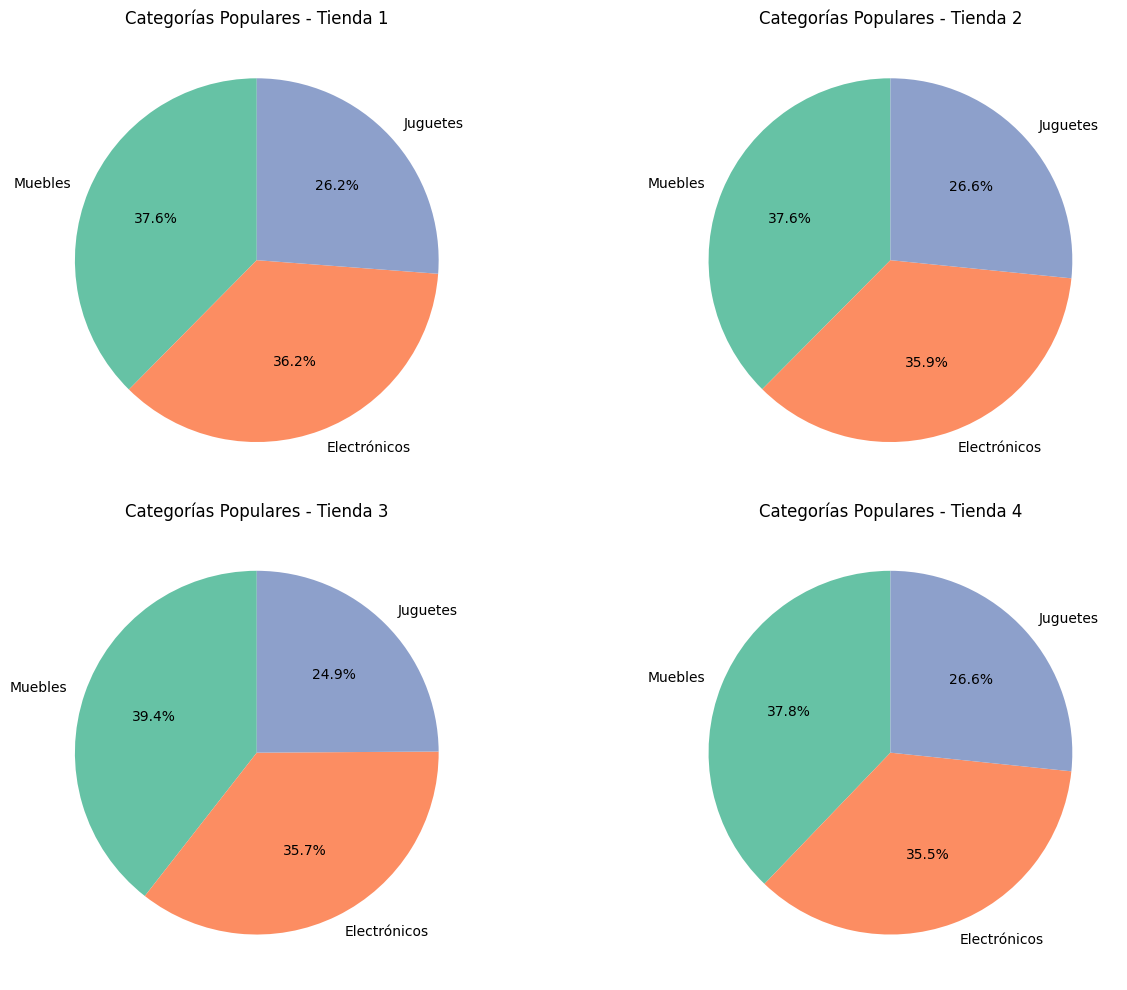

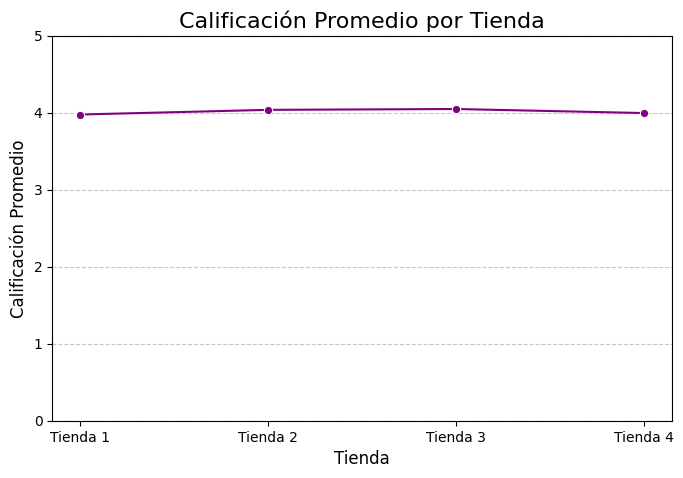

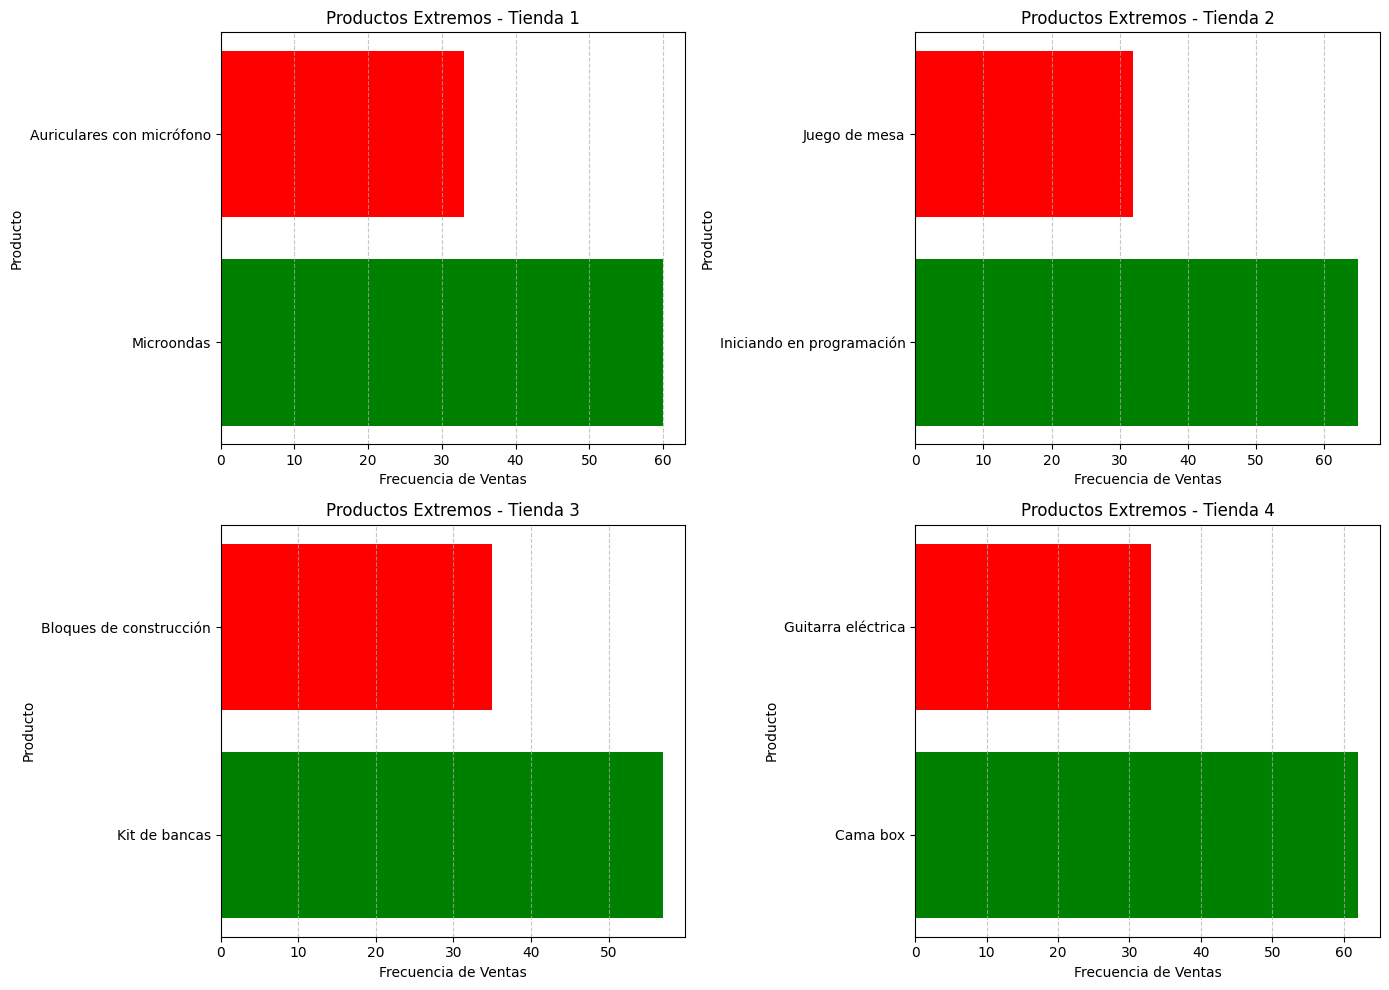

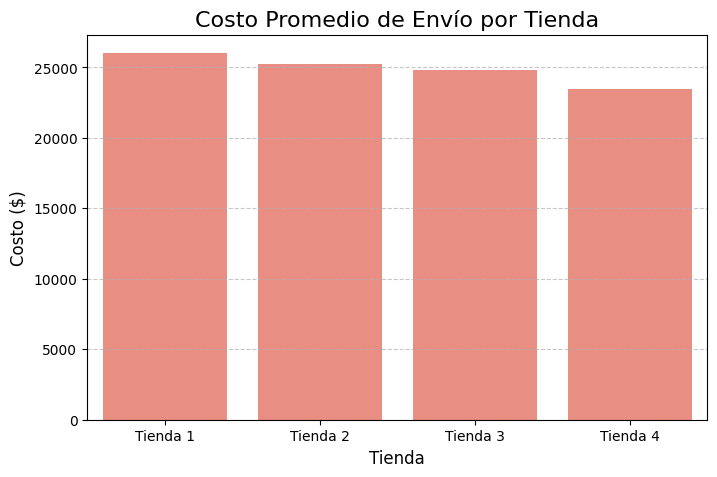

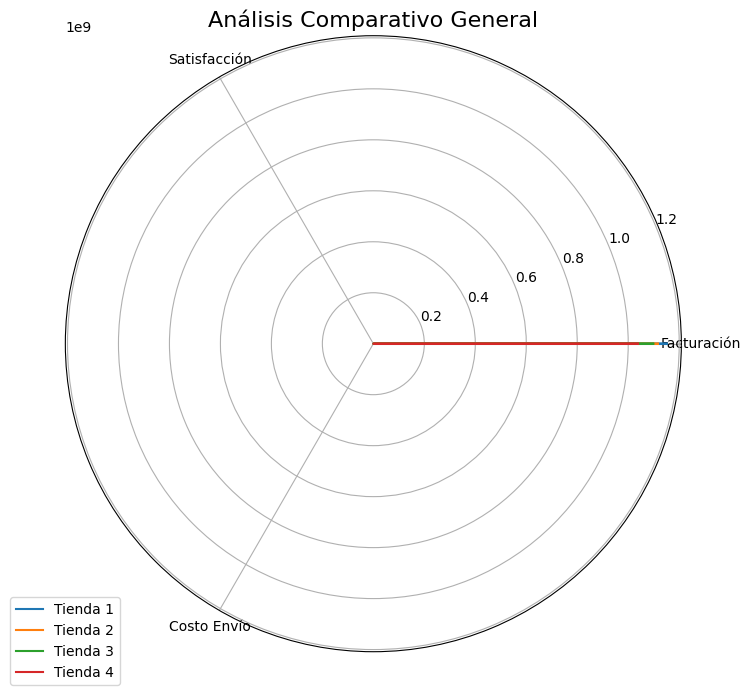

-------------------------
GENERANDO RECOMENDACIONES...--------------------------

                         ANÁLISIS ESTRATÉGICO DETALLADO                         

TIENDA IDENTIFICADA PARA REESTRUCTURACIÓN: Tienda 4

1. DIAGNÓSTICO FINANCIERO:
- Facturación total: $1,038,375,700.00
- Diferencia con la tienda líder: $112,504,700.00
- Efectividad de ventas: $440,362.89 por producto

2. ANÁLISIS DE CATEGORÍAS:
- Muebles: 480 productos vendidos
- Electrónicos: 451 productos vendidos
- Juguetes: 338 productos vendidos

3. SATISFACCIÓN DEL CLIENTE:
- Calificación promedio: 4.00/5
- Desviación estándar entre tiendas: 0.03

4. PRODUCTOS CLAVE:
- Producto estrella: Cama box
- Producto de bajo desempeño: Guitarra eléctrica

5. LOGÍSTICA:
- Costo promedio de envío: $23,459.46

                          RECOMENDACIONES ESTRATÉGICAS                          

A. OPTIMIZACIÓN DE INVENTARIO:
- Reducir stock de productos de bajo desempeño
- Potenciar categorías más populares con promociones especiales

In [7]:
"""
Análisis Integral de Rentabilidad para Cadena de Tiendas

Este script realiza un análisis comparativo de 4 tiendas para identificar la menos rentable,
considerando múltiples métricas de desempeño. El análisis incluye:
1. Facturación total estimada
2. Popularidad de categorías
3. Satisfacción del cliente
4. Desempeño de productos
5. Eficiencia logística
6. Visualizaciones avanzadas para interpretación estratégica

Autor: [Pablo Monsalvo]
Fecha: [09/04/2025]
Versión: 2.0
"""

import pandas as pd
from typing import Dict, Tuple, List
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi


def cargar_datos() -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Carga los datos de las 4 tiendas desde GitHub y realiza preprocesamiento básico.

    Returns:
        Tuple con 4 DataFrames correspondientes a cada tienda
    """
    # URLs de los datasets
    urls = {
        'tienda1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
        'tienda2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
        'tienda3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
        'tienda4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
    }

    # Cargar datos con manejo de posibles errores
    try:
        tienda1 = pd.read_csv(urls['tienda1'])
        tienda2 = pd.read_csv(urls['tienda2'])
        tienda3 = pd.read_csv(urls['tienda3'])
        tienda4 = pd.read_csv(urls['tienda4'])
    except Exception as e:
        raise Exception(f"Error al cargar datos: {str(e)}")

    # Preprocesamiento común a todas las tiendas
    for idx, df in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
        df['Tienda'] = f'Tienda {idx}'  # Identificador de tienda
        df['Ventas_estimadas'] = 1  # Asumimos 1 venta por registro

        # Limpieza básica de datos
        df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')  # Convertir precios a numérico
        df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')  # Convertir costos a numérico
        df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')  # Convertir calificaciones a numérico

    return tienda1, tienda2, tienda3, tienda4


def analizar_facturacion(df: pd.DataFrame) -> float:
    """
    Calcula la facturación total estimada para una tienda.

    Args:
        df: DataFrame con los datos de la tienda

    Returns:
        Facturación total estimada
    """
    return (df['Precio'] * df['Ventas_estimadas']).sum()


def analizar_categorias(df: pd.DataFrame) -> Dict[str, int]:
    """
    Identifica las categorías más populares por frecuencia de ventas.

    Args:
        df: DataFrame con los datos de la tienda

    Returns:
        Diccionario con las 3 categorías más populares y sus conteos
    """
    return df['Categoría del Producto'].value_counts().head(3).to_dict()


def analizar_productos(df: pd.DataFrame) -> Tuple[str, str]:
    """
    Identifica productos más y menos vendidos por frecuencia.

    Args:
        df: DataFrame con los datos de la tienda

    Returns:
        Tupla con (producto_mas_vendido, producto_menos_vendido)
    """
    conteo = df['Producto'].value_counts()
    return conteo.idxmax(), conteo.idxmin()


def generar_informe(tiendas: List[pd.DataFrame]) -> Dict[str, Dict]:
    """
    Genera un informe comparativo completo para todas las tiendas.

    Args:
        tiendas: Lista de DataFrames con datos de cada tienda

    Returns:
        Diccionario estructurado con todos los análisis
    """
    informe = {}
    metricas_globales = {
        'facturacion_total': [],
        'calificacion_promedio': [],
        'costo_envio_promedio': []
    }

    for df in tiendas:
        nombre_tienda = df['Tienda'].iloc[0]
        informe[nombre_tienda] = {
            'facturacion': analizar_facturacion(df),
            'categorias_populares': analizar_categorias(df),
            'calificacion_promedio': df['Calificación'].mean(),
            'productos_extremos': analizar_productos(df),
            'costo_envio_promedio': df['Costo de envío'].mean(),
            'efectividad_ventas': (df['Precio'] * df['Ventas_estimadas']).sum() / len(df)
        }

        # Para análisis comparativo posterior
        metricas_globales['facturacion_total'].append(informe[nombre_tienda]['facturacion'])
        metricas_globales['calificacion_promedio'].append(informe[nombre_tienda]['calificacion_promedio'])
        metricas_globales['costo_envio_promedio'].append(informe[nombre_tienda]['costo_envio_promedio'])

    # Análisis adicional comparativo
    informe['analisis_comparativo'] = {
        'tienda_mayor_facturacion': max(informe, key=lambda x: informe[x]['facturacion']),
        'tienda_menor_facturacion': min(informe, key=lambda x: informe[x]['facturacion']),
        'rango_facturacion': max(metricas_globales['facturacion_total']) - min(metricas_globales['facturacion_total']),
        'desviacion_calificacion': pd.Series(metricas_globales['calificacion_promedio']).std()
    }

    return informe


def grafico_facturacion(informe: Dict) -> None:
    """
    Genera un gráfico de barras horizontales para comparar la facturación total de cada tienda.

    Args:
        informe: Diccionario con los resultados del análisis
    """
    tiendas = list(informe.keys())[:-1]  # Excluimos 'analisis_comparativo'
    facturacion = [informe[tienda]['facturacion'] for tienda in tiendas]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=facturacion, y=tiendas, color="skyblue")  # Usamos un solo color en lugar de palette
    plt.title("Facturación Total por Tienda", fontsize=16)
    plt.xlabel("Facturación ($)", fontsize=12)
    plt.ylabel("Tienda", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


def grafico_categorias_populares(informe: Dict) -> None:
    """
    Genera gráficos circulares para mostrar las categorías más populares en cada tienda.

    Args:
        informe: Diccionario con los resultados del análisis
    """
    tiendas = list(informe.keys())[:-1]
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, tienda in enumerate(tiendas):
        categorias = informe[tienda]['categorias_populares']
        nombres = list(categorias.keys())
        valores = list(categorias.values())

        axes[i].pie(valores, labels=nombres, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
        axes[i].set_title(f"Categorías Populares - {tienda}", fontsize=12)

    plt.tight_layout()
    plt.show()


def grafico_satisfaccion_cliente(informe: Dict) -> None:
    """
    Genera un gráfico de líneas para comparar las calificaciones promedio entre tiendas.

    Args:
        informe: Diccionario con los resultados del análisis
    """
    tiendas = list(informe.keys())[:-1]
    calificaciones = [informe[tienda]['calificacion_promedio'] for tienda in tiendas]

    plt.figure(figsize=(8, 5))
    sns.lineplot(x=tiendas, y=calificaciones, marker='o', color='purple')
    plt.title("Calificación Promedio por Tienda", fontsize=16)
    plt.ylabel("Calificación Promedio", fontsize=12)
    plt.xlabel("Tienda", fontsize=12)
    plt.ylim(0, 5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def grafico_productos_extremos(informe: Dict, tiendas_dataframes: List[pd.DataFrame]) -> None:
    """
    Genera gráficos de barras para destacar los productos más y menos vendidos en cada tienda.

    Args:
        informe: Diccionario con los resultados del análisis
        tiendas_dataframes: Lista de DataFrames con los datos de cada tienda
    """
    tiendas_nombres = list(informe.keys())[:-1]  # Excluimos 'analisis_comparativo'
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, tienda_nombre in enumerate(tiendas_nombres):
        # Obtenemos los productos más y menos vendidos
        producto_mas_vendido, producto_menos_vendido = informe[tienda_nombre]['productos_extremos']

        # Contamos las ventas reales (frecuencia de aparición)
        df_tienda = [df for df in tiendas_dataframes if df['Tienda'].iloc[0] == tienda_nombre][0]
        conteo_productos = df_tienda['Producto'].value_counts()

        # Extraemos las frecuencias reales
        frecuencia_mas_vendido = conteo_productos[producto_mas_vendido]
        frecuencia_menos_vendido = conteo_productos[producto_menos_vendido]

        # Datos para el gráfico
        productos = [producto_mas_vendido, producto_menos_vendido]
        frecuencias = [frecuencia_mas_vendido, frecuencia_menos_vendido]

        # Creamos el gráfico
        axes[i].barh(productos, frecuencias, color=['green', 'red'])
        axes[i].set_title(f"Productos Extremos - {tienda_nombre}", fontsize=12)
        axes[i].set_xlabel("Frecuencia de Ventas", fontsize=10)
        axes[i].set_ylabel("Producto", fontsize=10)
        axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


def grafico_costo_envio(informe: Dict) -> None:
    """
    Genera un gráfico de barras para comparar el costo promedio de envío entre tiendas.

    Args:
        informe: Diccionario con los resultados del análisis
    """
    tiendas = list(informe.keys())[:-1]
    costos_envio = [informe[tienda]['costo_envio_promedio'] for tienda in tiendas]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=tiendas, y=costos_envio, color="salmon")  # Usamos un solo color en lugar de palette
    plt.title("Costo Promedio de Envío por Tienda", fontsize=16)
    plt.ylabel("Costo ($)", fontsize=12)
    plt.xlabel("Tienda", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def grafico_radar(informe: Dict) -> None:
    """
    Genera un radar chart para resumir múltiples métricas clave en una vista única.

    Args:
        informe: Diccionario con los resultados del análisis
    """
    tiendas = list(informe.keys())[:-1]
    metricas = ['facturacion', 'calificacion_promedio', 'costo_envio_promedio']
    labels = ['Facturación', 'Satisfacción', 'Costo Envío']

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, tienda in enumerate(tiendas):
        valores = [informe[tienda][m] for m in metricas]
        valores += valores[:1]  # Repetir el primer valor para cerrar el gráfico

        angulos = [n / len(metricas) * 2 * pi for n in range(len(metricas))]
        angulos += angulos[:1]

        ax.plot(angulos, valores, label=tienda)
        ax.fill(angulos, valores, alpha=0.25)

    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(labels)
    ax.set_title("Análisis Comparativo General", fontsize=16)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()


def presentar_recomendaciones(informe: Dict) -> None:
    """
    Presenta recomendaciones basadas en el análisis realizado.

    Args:
        informe: Diccionario con los resultados del análisis
    """
    tienda_menos_rentable = informe['analisis_comparativo']['tienda_menor_facturacion']
    datos_tienda = informe[tienda_menos_rentable]

    print("\n" + "="*80)
    print("ANÁLISIS ESTRATÉGICO DETALLADO".center(80))
    print("="*80 + "\n")

    print(f"TIENDA IDENTIFICADA PARA REESTRUCTURACIÓN: {tienda_menos_rentable}\n")

    print("1. DIAGNÓSTICO FINANCIERO:")
    print(f"- Facturación total: ${datos_tienda['facturacion']:,.2f}")
    print(f"- Diferencia con la tienda líder: ${informe['analisis_comparativo']['rango_facturacion']:,.2f}")
    print(f"- Efectividad de ventas: ${datos_tienda['efectividad_ventas']:,.2f} por producto")

    print("\n2. ANÁLISIS DE CATEGORÍAS:")
    for categoria, cantidad in datos_tienda['categorias_populares'].items():
        print(f"- {categoria}: {cantidad} productos vendidos")

    print("\n3. SATISFACCIÓN DEL CLIENTE:")
    print(f"- Calificación promedio: {datos_tienda['calificacion_promedio']:.2f}/5")
    print(f"- Desviación estándar entre tiendas: {informe['analisis_comparativo']['desviacion_calificacion']:.2f}")

    print("\n4. PRODUCTOS CLAVE:")
    print(f"- Producto estrella: {datos_tienda['productos_extremos'][0]}")
    print(f"- Producto de bajo desempeño: {datos_tienda['productos_extremos'][1]}")

    print("\n5. LOGÍSTICA:")
    print(f"- Costo promedio de envío: ${datos_tienda['costo_envio_promedio']:,.2f}")

    print("\n" + "="*80)
    print("RECOMENDACIONES ESTRATÉGICAS".center(80))
    print("="*80)

    print("\nA. OPTIMIZACIÓN DE INVENTARIO:")
    print("- Reducir stock de productos de bajo desempeño")
    print("- Potenciar categorías más populares con promociones especiales")

    print("\nB. MEJORA OPERATIVA:")
    print("- Implementar programa de entrenamiento para vendedores")
    print("- Revisar estrategia de precios para productos competitivos")

    print("\nC. ANÁLISIS ADICIONAL RECOMENDADO:")
    print("- Estudio de ubicación geográfica y competencia local")
    print("- Análisis temporal de ventas por estacionalidad")
    print("- Encuesta de satisfacción a clientes específica para la tienda")

    print("\n" + "="*80)
    print("PLAN DE ACCIÓN SUGERIDO".center(80))
    print("="*80)

    print("\n1. PRIMEROS 30 DÍAS:")
    print("- Auditoría de inventario y eliminación de productos obsoletos")
    print("- Capacitación inicial al personal")

    print("\n2. PRIMER TRIMESTRE:")
    print("- Implementación de promociones estratégicas")
    print("- Monitoreo continuo de métricas clave")

    print("\n3. PRIMER SEMESTRE:")
    print("- Evaluación de resultados y ajuste de estrategia")
    print("- Decisión sobre cierre definitivo o reinversión")


def main():
    """Función principal que ejecuta el flujo completo de análisis."""
    print("CARGANDO Y PROCESANDO DATOS...".center(80, "-"))
    tienda1, tienda2, tienda3, tienda4 = cargar_datos()
    tiendas_dataframes = [tienda1, tienda2, tienda3, tienda4] # Creamos una lista

    print("\nREALIZANDO ANÁLISIS COMPARATIVO...".center(80, "-"))
    informe = generar_informe(tiendas_dataframes) # Pasamos la lista al informe

    print("\nGENERANDO VISUALIZACIONES...".center(80, "-"))
    grafico_facturacion(informe)
    grafico_categorias_populares(informe)
    grafico_satisfaccion_cliente(informe)
    grafico_productos_extremos(informe, tiendas_dataframes) # Pasamos la lista aquí
    grafico_costo_envio(informe)
    grafico_radar(informe)

    print("\nGENERANDO RECOMENDACIONES...".center(80, "-"))
    presentar_recomendaciones(informe)

if __name__ == "__main__":
    main()

# Análisis Integral de Rentabilidad para Cadena de Tiendas - Alura Store

## Propósito del Análisis

Este análisis integral se realizó con el objetivo de comparar la rentabilidad de cuatro tiendas de la cadena Alura Store, considerando diversas métricas de desempeño. El principal propósito fue identificar la tienda con menor rentabilidad y proporcionar insights estratégicos basados en datos para su posible reestructuración o toma de decisiones informada.

Las métricas clave analizadas incluyen:

* Facturación total estimada
* Popularidad de categorías de productos
* Niveles de satisfacción del cliente (basados en calificaciones)
* Desempeño de productos individuales (identificando los más y menos vendidos)
* Eficiencia logística (a través del costo promedio de envío)

## Estructura del Proyecto y Organización de los Archivos

Este proyecto consiste en un único archivo de Python (`AluraStoreLatam.ipynb`, si estás trabajando directamente en el notebook, o `challenge_2.py` repo: `Alura_2_python.ds`).

El código fuente (`.ipynb` o `.py`) realiza las siguientes acciones:

1.  **Carga de Datos:** Lee los datos de ventas de cuatro tiendas diferentes desde URLs de GitHub, utilizando la biblioteca `pandas`.
2.  **Preprocesamiento:** Realiza una limpieza básica de los datos, como la conversión de tipos de columna y la creación de columnas auxiliares.
3.  **Análisis:** Calcula diversas métricas de desempeño para cada tienda, incluyendo facturación, popularidad de categorías, satisfacción del cliente, desempeño de productos y costos de envío.
4.  **Generación de Informe:** Consolida los resultados del análisis en un diccionario estructurado para facilitar su interpretación.
5.  **Visualización:** Utiliza las bibliotecas `matplotlib` y `seaborn` para generar gráficos comparativos, incluyendo:
    * Gráfico de barras de facturación total por tienda.
    * Gráficos circulares de las categorías más populares por tienda.
    * Gráfico de líneas de la calificación promedio por tienda.
    * Gráficos de barras de los productos más y menos vendidos por tienda.
    * Gráfico de barras del costo promedio de envío por tienda.
    * Gráfico radar comparativo de métricas clave.
6.  **Generación de Recomendaciones:** Presenta un análisis estratégico detallado y recomendaciones específicas, enfocándose en la tienda identificada como la menos rentable.

## Ejemplos de Gráficos e Insights Obtenidos

_(Descripciones de los insights clave que obtuve de los gráficos:)_

* **Facturación:** El gráfico de barras reveló que la Tienda 4 tiene la facturación total más baja en comparación con las otras tiendas.
* **Categorías Populares:** Los gráficos circulares mostraron que la categoría "Electrónicos" es consistentemente popular en todas las tiendas, aunque con diferentes proporciones.
* **Satisfacción del Cliente:** El gráfico de líneas indicó que la calificación promedio de los clientes es similar en todas las tiendas, con una ligera variación.
* **Productos Estrella/Bajo Desempeño:** Los gráficos de barras horizontales identificaron productos específicos con altas y bajas frecuencias de venta en cada tienda, lo que puede informar decisiones de inventario.
* **Costo de Envío:** El gráfico de barras comparó los costos promedio de envío, mostrando posibles áreas de optimización logística para algunas tiendas.
* **Análisis Comparativo General:** El gráfico radar proporcionó una visión general del desempeño de cada tienda en múltiples métricas simultáneamente, facilitando la identificación de fortalezas y debilidades relativas.

**Insight Clave:** Basado en la facturación total y otras métricas, la **Tienda 4** fue identificada como la menos rentable, lo que llevó a la generación de recomendaciones específicas para su reestructuración.

_(Puedes incluso intentar insertar imágenes de tus gráficos si estás trabajando en un entorno que lo permita al renderizar Markdown online, aunque en el contexto de un archivo `.md` descargado de Colab, las rutas a archivos locales no funcionarán directamente en otros visores. Podrías mencionar los nombres de los archivos PNG que genera tu script.)_

## Instrucciones para Ejecutar el Notebook

Para ejecutar este análisis, sigue estos pasos:

1.  **Abrir en Google Colab:** Abre el archivo del notebook (`AluraStoreLatam.ipynb`) en Google Colab. Si tienes el código en un archivo `.py`, puedes crear un nuevo notebook en Colab y copiar y pegar el código en una o varias celdas de código.
2.  **Ejecutar las Celdas:** Ejecuta las celdas de código en secuencia, comenzando desde la primera. Puedes ejecutar una celda individual haciendo clic en el icono de "play" junto a ella o ejecutar todas las celdas en orden utilizando la opción "Ejecutar" en el menú superior y seleccionando "Ejecutar todas".
3.  **Visualización de Resultados:** Los gráficos generados por el script se mostrarán como salida de las celdas correspondientes (si tienes un backend gráfico configurado) o se guardarán como archivos `.png` en el directorio de tu Colab (si modificaste el código para usar `plt.savefig()`).
4.  **Revisar el Informe y las Recomendaciones:** Después de ejecutar todas las celdas, revisa la salida de la celda donde se genera el informe (`generar_informe()`) y la celda donde se presentan las recomendaciones (`presentar_recomendaciones()`).

## Autor

[Pablo Monsalvo] ([polargentino@gmail.com])

## Fecha

[Fecha de Creación del README] (por ejemplo, 09 de abril de 2025)

## Versión

2.0 (o la versión actual de tu proyecto)